<a href="https://colab.research.google.com/github/ARJUN108-verma/LLMs-Large-Language-Models-/blob/main/Text_Classification_with_XLNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Classification with XLNET:-

In [95]:
!pip install cleantext

In [96]:
!pip install clean

In [97]:
import pandas as pd
import numpy as np
import cleantext as clean
import re
from transformers import XLNetTokenizer, XLNetForSequenceClassification, pipeline, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [99]:
!pip install datasets

In [100]:
!pip install evaluate

In [101]:
import datasets
import evaluate
import random

Preprocess the data:-

In [102]:
data_val = pd.read_csv("/content/emotion-labels-val.csv")
data_train = pd.read_csv("/content/emotion-labels-train.csv")
data_test = pd.read_csv("/content/emotion-labels-test.csv")

In [103]:
data_val.head()

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy


In [104]:
data_train.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [105]:
data_test.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [106]:
data = pd.concat([data_train, data_val, data_test], ignore_index=True)

In [107]:
import cleantext as clean

In [108]:

data['text_clean'] = data['text'].apply(lambda x: clean.clean(x, clean_all= True, extra_spaces=True))

In [109]:

data['text_clean'] = data['text_clean'].apply(lambda x: re.sub(r'http\S+', '', x))

In [110]:
data.head(27)

,text,label,text_clean
0,Just got back from seeing @GaryDelaney in Burs...,joy,Just got back from seeing @GaryDelaney in Burs...
1,Oh dear an evening of absolute hilarity I don'...,joy,Oh dear an evening of absolute hilarity I don'...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,Been waiting all week for this game ❤️❤️❤️ #ch...
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,"@gardiner_love : Thank you so much, Gloria! Yo..."
4,I feel so blessed to work with the family that...,joy,I feel so blessed to work with the family that...
5,"Today I reached 1000 subscribers on YT!! , #go...",joy,"Today I reached 1000 subscribers on YT!! , #go..."
6,"@Singaholic121 Good morning, love! Happy first...",joy,"@Singaholic121 Good morning, love! Happy first..."
7,#BridgetJonesBaby is the best thing I've seen ...,joy,#BridgetJonesBaby is the best thing I've seen ...
8,Just got back from seeing @GaryDelaney in Burs...,joy,Just got back from seeing @GaryDelaney in Burs...
9,@IndyMN I thought the holidays could not get a...,joy,@IndyMN I thought the holidays could not get a...


<Axes: xlabel='label'>

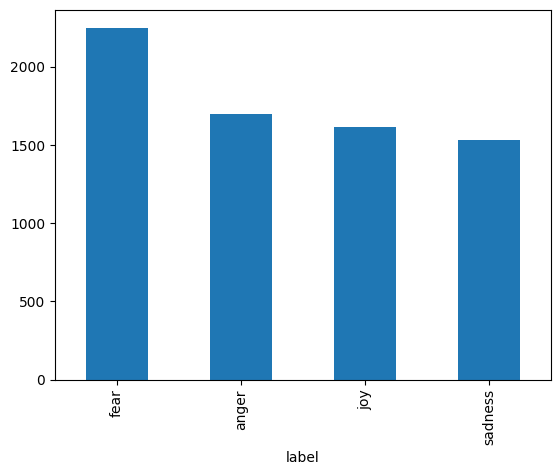

In [111]:
data['label'].value_counts().plot(kind='bar')

In [112]:
g = data.groupby('label')

In [113]:
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

<Axes: xlabel='label'>

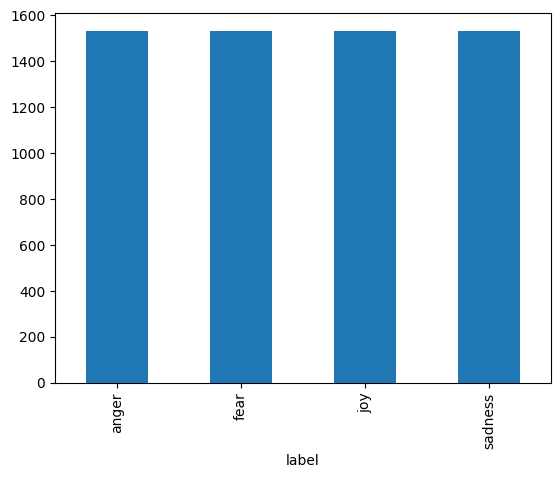

In [114]:
data['label'].value_counts().plot(kind='bar')

In [115]:

data['label'] = LabelEncoder().fit_transform(data['label'])

In [116]:
NUM_LABELS = 4

Split:-

In [117]:
train_split, test_split = train_test_split(data, test_size=0.2, random_state=42)

In [118]:

train_slit, val_split = train_test_split(train_split, train_size = 0.9)

In [119]:
print(len(train_slit))
print(len(val_split))
print(len(test_split))

4414
491
1227


In [120]:
print(train_split.columns)

Index(['text', 'label', 'text_clean'], dtype='object')


In [121]:
train_df = pd.DataFrame({
    "label": train_split["label"].values,
    "text": train_split["text_clean"].values
})

In [122]:
train_split["label_int"] = train_split["label"].astype('category').cat.codes

In [123]:
test_df = pd.DataFrame({
    "label": train_split["label_int"].values,
    "text": train_split["text_clean"].values
})


In [124]:
from datasets import Dataset

train_dataset = Dataset.from_dict(train_df.to_dict("list"))
test_dataset = Dataset.from_dict(test_df.to_dict("list"))

In [125]:
dataset_dict = datasets.DatasetDict({"train":train_df, "test":test_df})

In [126]:
dataset_dict


DatasetDict({
    train:       label                                               text
    0         2  @WHUFC_HUB @westhamtransfer @TheHammers_ I don...
    1         0  Hey all you white people out there; are you #o...
    2         1  Friday is here, and we are open tonight and to...
    3         1                                Librarians scare me
    4         0  @DailyMirror i love how theres no outrage that...
    ...     ...                                                ...
    4900      2  Panda eyed jaunty after watching jaws until late!
    4901      3  @Eeevah14 don't I know it, try not to fret my ...
    4902      3  @DeltaAssist Tried 2 get earlier flt 2day @BWI...
    4903      3  @A_RockasThe U.S. has added years to the Syria...
    4904      0    My mind is raging and i just want to end it all
    
    [4905 rows x 2 columns]
    test:       label                                               text
    0         2  @WHUFC_HUB @westhamtransfer @TheHammers_ I don...
  

Create embeddings:-

In [127]:
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")

In [128]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding = "max_length", max_length = 128, truncation=True)

In [129]:
from datasets import Dataset, DatasetDict

In [130]:
dataset_dict = DatasetDict({
    "train": Dataset.from_pandas(train_df),
    "test": Dataset.from_pandas(test_df)
})

In [131]:
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

Map:   0%|          | 0/4905 [00:00<?, ? examples/s]

Map:   0%|          | 0/4905 [00:00<?, ? examples/s]

In [132]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['label', 'text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4905
    })
    test: Dataset({
        features: ['label', 'text', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4905
    })
})

In [133]:
print(tokenized_datasets['train']['text'][0])

@WHUFC_HUB @westhamtransfer @TheHammers_ I don't see any reason for optimism at this point. Just stringing together bad performances.


In [134]:
print(tokenized_datasets['train']['input_ids'][0])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 17, 13304, 967, 18315, 9513, 2732, 18315, 698, 17, 13304, 5538, 1714, 7752, 2755, 17, 13304, 152, 3922, 8584, 23, 2732, 35, 220, 26, 46, 197, 124, 994, 28, 12330, 38, 52, 424, 9, 1641, 4905, 56, 511, 948, 5296, 9, 4, 3]


In [135]:
tokenizer.decode(5)

'<pad>'

In [136]:
print(tokenized_datasets['train']['token_type_ids'][0])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


In [137]:
print(tokenized_datasets['train']['attention_mask'][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [138]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(100))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(100))

Fine tune our model:-

In [139]:
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased',
                                                       num_labels=NUM_LABELS,
                                                       id2label={0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'})

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU

In [140]:
metric = evaluate.load("accuracy")

In [141]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [142]:
training_args = TrainingArguments(output_dir="test_trainer", eval_strategy="epoch", num_train_epochs=3)

In [143]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics)

In [144]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.324160,0.390000
2,No log,1.247265,0.530000
3,No log,1.129238,0.700000


TrainOutput(global_step=39, training_loss=1.38413571088742, metrics={'train_runtime': 847.5469, 'train_samples_per_second': 0.354, 'train_steps_per_second': 0.046, 'total_flos': 21366375321600.0, 'train_loss': 1.38413571088742, 'epoch': 3.0})

Evaluate model:-



In [145]:
trainer.evaluate()


{'eval_loss': 1.129238247871399,
 'eval_accuracy': 0.7,
 'eval_runtime': 56.1785,
 'eval_samples_per_second': 1.78,
 'eval_steps_per_second': 0.231,
 'epoch': 3.0}

In [146]:
model.save_pretrained("fine_tuned_model")

In [147]:

fine_tuned_model = XLNetForSequenceClassification.from_pretrained("fine_tuned_model")

In [148]:


clf = pipeline("text-classification", fine_tuned_model, tokenizer=tokenizer)


Device set to use cpu


In [149]:
rand_int = random.randint(0, len(val_split))
print(val_split['text_clean'][rand_int])
answer = clf(val_split['text_clean'][rand_int], top_k=None)
print(answer)

/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cudf/pandas/fast_slow_proxy.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return fn(*args, **kwargs)


Accept the challenges so that you can feel the exhilaration of victory.' - George S. Patton
[{'label': 'anger', 'score': 0.3473387658596039}, {'label': 'fear', 'score': 0.22718685865402222}, {'label': 'sadness', 'score': 0.2173534333705902}, {'label': 'joy', 'score': 0.20812086760997772}]
